# Poker Hand dataset Classification

importing pandas and numpy

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
 Load the Data using Pandas and taking the First Look

In [101]:
test = pd.read_csv('data/poker-hand-testing.data', header=None)

In [102]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [103]:
train = pd.read_csv('data/poker-hand-training-true.data', header=None)

In [104]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [105]:
train.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','Label']

In [106]:
test.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','Label']

In [107]:
train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [108]:
test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [109]:
train.shape

(25010, 11)

In [110]:
test.shape

(1000000, 11)

Extract features and labels

The first two lines are selecting all the columns from the "train" and "test" dataframes except for the "Label" column, and storing them in the variables X_train and X_test respectively.

The next two lines are selecting only the "Label" column from the "train" and "test" dataframes and storing them in the variables Y_train and Y_test respectively.

This is a common approach used in machine learning to separate the features (columns that are used as input for the model) from the target variable (column that is predicted by the model). The training set is used to train the model, while the testing set is used to evaluate the model's performance on unseen data.





In [111]:
X_train = train.loc[:,train.columns != 'Label']

In [112]:
X_test = test.loc[:,test.columns != 'Label']

In [113]:
Y_train = train['Label']

In [114]:
Y_test = test['Label']


# Label Distribution in train and test set
The code you provided is calculating the distribution of the target variable (label) in the training and testing sets of the UCL poker hand dataset.

The first block of code shows the distribution of the target variable in the training set. The groupby() method is used to group the data by the label value (0 to 9), and then the size() method is used to count the number of samples for each label.

The result shows that the training set has 12493 samples with label 0, 10599 samples with label 1, 1206 samples with label 2, and so on, up to 5 samples for labels 8 and 9.

The second block of code shows the distribution of the target variable in the testing set. The same approach is used, and the result shows that the testing set has 501209 samples with label 0, 422498 samples with label 1, 47622 samples with label 2, and so on, up to 3 samples for label 9.

These results are important because they give an idea of how balanced the dataset is in terms of label distribution. In this case, we can see that labels 8 and 9 are very rare in the dataset, which might affect the model's ability to predict them accurately. Additionally, if the dataset is heavily imbalanced, it may be necessary to use techniques such as oversampling or undersampling to ensure that the model is not biased towards the majority class.

In [115]:
Y_train.groupby(Y_train).size()

Label
0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        5
Name: Label, dtype: int64

In [116]:
Y_test.groupby(Y_test).size()

Label
0    501209
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: Label, dtype: int64

# Using Helper Function
The preprocess_data function takes a Pandas DataFrame as input and performs the following operations on it:

Create a copy of the input DataFrame.
Extract the columns containing card ranks (C1, C2, C3, C4, C5) and sort them in ascending order.
Update the original DataFrame with the sorted card ranks and keep the original suit columns (S1, S2, S3, S4, S5) and the label column (Label).
Return the updated DataFrame.
The add_counts function takes a DataFrame as input and adds new columns to it containing the number of occurrences of each card rank and suit in the hand.

The add_diffs function takes a DataFrame as input and adds new columns to it containing the differences between consecutive card ranks in the hand.

The add_unique_count function takes a DataFrame as input and adds a new column to it containing the number of unique suits in the hand.

Finally, the cross_validation function performs k-fold cross-validation on a given machine learning algorithm using the training data (X_train, Y_train) and returns the mean accuracy score over the k-folds. This function uses the KFold class from the sklearn.model_selection module to split the data into training and validation sets. During each iteration of the cross-validation loop, the algorithm is trained on the training set, and the accuracy score is computed on the validation set. The accuracy scores from each fold are stored in a Pandas Series, and the mean value is returned as the final accuracy score.


In [117]:
def preprocess_data(data:pd.DataFrame):
    df = data.copy()
    dfc = df[['C1', 'C2', 'C3', 'C4', 'C5']]
    dfc.values.sort()
    df[['C1', 'C2', 'C3', 'C4', 'C5']] = dfc
    df = df[['C1', 'C2', 'C3', 'C4', 'C5', 'S1', 'S2', 'S3', 'S4', 'S5', 'Label']]
    return df

In [118]:
def add_counts(df:pd.DataFrame):
    tmp = df[['C1', 'C2', 'C3', 'C4', 'C5']]
    df['Cnt_C1'] = tmp.apply(lambda x: sum(x==x[0]) ,axis=1)
    df['Cnt_C2'] = tmp.apply(lambda x: sum(x==x[1]) ,axis=1)
    df['Cnt_C3'] = tmp.apply(lambda x: sum(x==x[2]) ,axis=1)
    df['Cnt_C4'] = tmp.apply(lambda x: sum(x==x[3]) ,axis=1)
    df['Cnt_C5'] = tmp.apply(lambda x: sum(x==x[4]) ,axis=1)
    
    tmp = df[['S1', 'S2', 'S3', 'S4', 'S5']]
    df['Cnt_S1'] = tmp.apply(lambda x: sum(x==x[0]) ,axis=1)
    df['Cnt_S2'] = tmp.apply(lambda x: sum(x==x[1]) ,axis=1)
    df['Cnt_S3'] = tmp.apply(lambda x: sum(x==x[2]) ,axis=1)
    df['Cnt_S4'] = tmp.apply(lambda x: sum(x==x[3]) ,axis=1)    
    df['Cnt_S5'] = tmp.apply(lambda x: sum(x==x[4]) ,axis=1)

In [119]:
def add_diffs(df:pd.DataFrame):
    df['Diff1'] = df['C5'] - df['C4']
    df['Diff2'] = df['C4'] - df['C3']
    df['Diff3'] = df['C3'] - df['C2']
    df['Diff4'] = df['C2'] - df['C1']

In [120]:
def add_unique_count(df:pd.DataFrame):
    tmp = df[['S1', 'S2', 'S3', 'S4', 'S5']]
    df['UniqueS'] = tmp.apply(lambda x: len(np.unique(x)) , axis=1)

In [121]:
def cross_validation(alg, X_train, Y_train, folds=10):
    kf = KFold(n_splits = folds, shuffle=True)

    acc = []
    matrix = None
    first = True

    i = 1
    for train_index, test_index in kf.split(X_train, Y_train):
        print('{}-Fold'.format(i))
        fX_train, fX_test = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        fy_train, fy_test = Y_train[train_index], Y_train[test_index]
        alg.fit(fX_train, fy_train)
        fy_pred = alg.predict(fX_test)
        curr = accuracy_score(fy_test, fy_pred, normalize=True)
        acc.append(curr)
        i = i+1

    acc = pd.Series(acc)
    return acc.mean()

# importing 

In [122]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from xgboost import XGBClassifier

In [123]:
alg = DecisionTreeClassifier(random_state=1)
alg.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [124]:
y_pred = alg.predict(X_test)


In [125]:
y_pred = alg.predict(X_test)

In [126]:
accuracy_score(Y_test, y_pred, normalize=True)

0.479239

In [127]:
X_train_pre = preprocess_data(train)
X_test_pre = preprocess_data(test)
X_train = X_train_pre.loc[:,X_train_pre.columns != 'Label']
X_test = X_test_pre.loc[:,X_test_pre.columns != 'Label']


In [128]:
alg = DecisionTreeClassifier(random_state=1, criterion='gini')
cross_validation(alg, X_train, Y_train)

1-Fold
2-Fold
3-Fold
4-Fold
5-Fold
6-Fold
7-Fold
8-Fold
9-Fold
10-Fold


0.9553778488604558

In [129]:
alg = DecisionTreeClassifier(random_state=1, criterion='gini')
alg.fit(X_train, Y_train)
y_pred = alg.predict(X_test)
accuracy_score(Y_test, y_pred, normalize=True)

0.960249

In [130]:
pd.crosstab(y_pred, Y_test, rownames=['Predicted'], colnames=['True'], margins=True)

True,0,1,2,3,4,5,6,7,8,9,All
Predicted,,,,,,,,,,,
0,494264,2631,5,19,0,1864,0,0,0,0,498783
1,1556,408995,11216,1870,300,1,70,4,0,0,424012
2,0,9361,35858,490,153,0,440,23,0,0,46325
3,0,845,232,17664,0,0,619,144,0,0,19504
4,0,507,73,12,3004,0,0,0,12,0,3608
5,5389,24,0,0,0,131,0,0,0,0,5544
6,0,125,238,1012,0,0,285,14,0,0,1674
7,0,0,0,54,0,0,10,45,0,0,109
8,0,10,0,0,292,0,0,0,0,0,302


In [131]:
pred_series = pd.Series(y_pred).groupby(y_pred).size()
true_series = pd.Series(Y_test.values).groupby(Y_test).size()
pred_res = pd.DataFrame()
pred_res['TrueLabel'] = true_series
pred_res['PredictedLabel'] = pred_series

In [132]:
pred_res

,TrueLabel,PredictedLabel
Label,,
0,501209,498783
1,422498,424012
2,47622,46325
3,21121,19504
4,3885,3608
5,1996,5544
6,1424,1674
7,230,109
8,12,302


<AxesSubplot:xlabel='Label', ylabel='Count'>

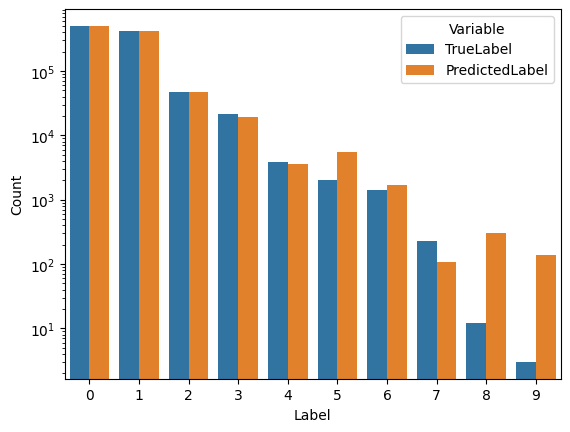

In [133]:
f, ax = plt.subplots()
ax.set(yscale="log")
sns.barplot(data=pred_res.stack().reset_index().rename(columns={0: 'Count', 'level_1': 'Variable'}), x='Label', y='Count', hue='Variable')

In [134]:
add_unique_count(X_test)

In [135]:
add_unique_count(X_train) 

In [136]:
alg = DecisionTreeClassifier(random_state=1, criterion='gini')
cross_validation(alg, X_train, Y_train)

1-Fold
2-Fold
3-Fold
4-Fold
5-Fold
6-Fold
7-Fold
8-Fold
9-Fold
10-Fold


0.9612155137944821

In [137]:
alg = DecisionTreeClassifier(random_state=1, criterion='gini')
alg.fit(X_train, Y_train)
y_pred = alg.predict(X_test)
accuracy_score(Y_test, y_pred, normalize=True)

0.965003

<AxesSubplot:xlabel='Label', ylabel='Count'>

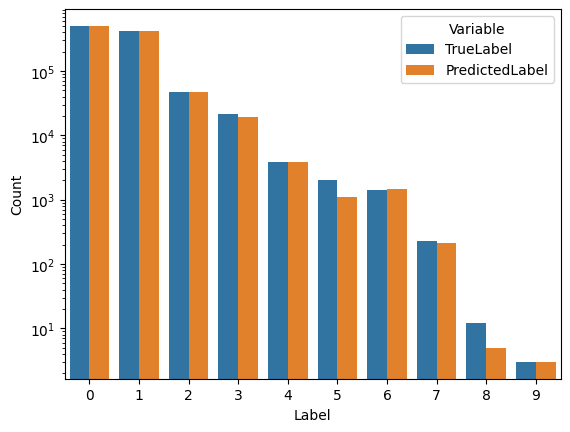

In [138]:
pred_series = pd.Series(y_pred).groupby(y_pred).size()
true_series = pd.Series(Y_test.values).groupby(Y_test).size()
pred_res = pd.DataFrame()
pred_res['TrueLabel'] = true_series
pred_res['PredictedLabel'] = pred_series
f, ax = plt.subplots()
ax.set(yscale="log")
sns.barplot(data=pred_res.stack().reset_index().rename(columns={0: 'Count', 'level_1': 'Variable'}), x='Label', y='Count', hue='Variable')

In [139]:
add_diffs(X_train)

In [140]:
add_diffs(X_test)

In [141]:
alg = DecisionTreeClassifier(random_state=1, criterion='gini')
cross_validation(alg, X_train, Y_train)

1-Fold
2-Fold
3-Fold
4-Fold
5-Fold
6-Fold
7-Fold
8-Fold
9-Fold
10-Fold


0.9997600959616154

In [142]:
alg = DecisionTreeClassifier(random_state=1, criterion='gini')
alg.fit(X_train, Y_train)
y_pred = alg.predict(X_test)
accuracy_score(Y_test, y_pred, normalize=True)

0.999904

<AxesSubplot:xlabel='Label', ylabel='Count'>

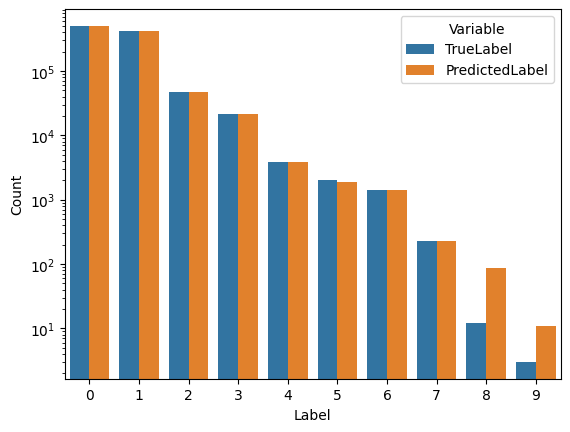

In [143]:
pred_series = pd.Series(y_pred).groupby(y_pred).size()
true_series = pd.Series(Y_test.values).groupby(Y_test).size()
pred_res = pd.DataFrame()
pred_res['TrueLabel'] = true_series
pred_res['PredictedLabel'] = pred_series
f, ax = plt.subplots()
ax.set(yscale="log")
sns.barplot(data=pred_res.stack().reset_index().rename(columns={0: 'Count', 'level_1': 'Variable'}), x='Label', y='Count', hue='Variable')

In [144]:
pd.crosstab(y_pred, Y_test, rownames=['Predicted'], colnames=['True'], margins=True)

True,0,1,2,3,4,5,6,7,8,9,All
Predicted,,,,,,,,,,,
0,501209,0,0,0,0,0,0,0,0,0,501209
1,0,422498,0,0,0,0,0,0,0,0,422498
2,0,0,47622,0,0,0,0,0,0,0,47622
3,0,0,0,21121,0,0,0,0,0,0,21121
4,0,0,0,0,3885,0,0,0,0,0,3885
5,0,0,0,0,0,1906,0,0,6,0,1912
6,0,0,0,0,0,0,1424,0,0,0,1424
7,0,0,0,0,0,0,0,230,0,0,230
8,0,0,0,0,0,82,0,0,6,0,88


In [145]:
alg = RandomForestClassifier(criterion='gini', n_estimators=10, random_state=111, n_jobs=4)
cross_validation(alg, X_train, Y_train)

1-Fold
2-Fold
3-Fold
4-Fold
5-Fold
6-Fold
7-Fold
8-Fold
9-Fold
10-Fold


0.9979608156737306

In [146]:
alg = RandomForestClassifier(criterion='entropy', n_estimators=51, random_state=111, n_jobs=4)
cross_validation(alg, X_train, Y_train)

1-Fold
2-Fold
3-Fold
4-Fold
5-Fold
6-Fold
7-Fold
8-Fold
9-Fold
10-Fold


0.9988004798080766

In [147]:
alg = GradientBoostingClassifier(n_estimators=10, random_state=111)
cross_validation(alg, X_train, Y_train)

1-Fold
2-Fold
3-Fold
4-Fold
5-Fold
6-Fold
7-Fold
8-Fold
9-Fold
10-Fold


0.9952019192323072

In [148]:
alg = XGBClassifier(n_estimators=10, random_state=111)
cross_validation(alg, X_train, Y_train)

1-Fold
[22:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


2-Fold
[22:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


3-Fold
[22:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


4-Fold
[22:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


5-Fold
[22:29:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


6-Fold
[22:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


7-Fold
[22:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


8-Fold
[22:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


9-Fold
[22:29:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


10-Fold
[22:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9974810075969611

In [149]:
alg = DecisionTreeClassifier(criterion='gini', random_state=111)

In [150]:
alg.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=111)

In [151]:
y_pred = alg.predict(X_test)

In [152]:
accuracy_score(y_pred=y_pred, y_true=Y_test, normalize=True)

0.999944

In [153]:
feature_imp = pd.DataFrame(sorted(zip(X_train.columns, alg.feature_importances_), key=lambda k: k[1], reverse=True))
feature_imp.columns = ['Feature', 'Importance']

<AxesSubplot:xlabel='Feature', ylabel='Importance'>

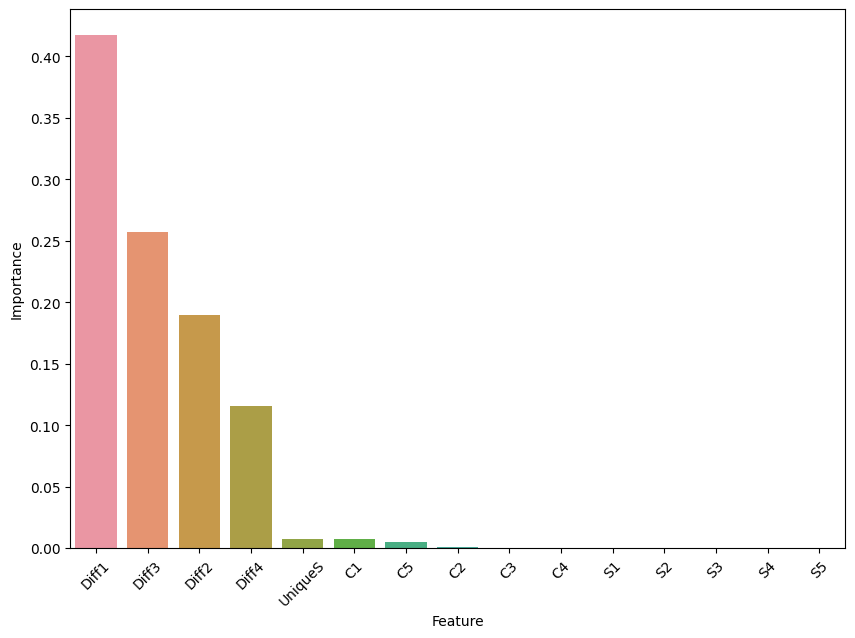

In [154]:
f, ax = plt.subplots(figsize=(10, 7))
# ax.set(yscale="log")
plt.xticks(rotation=45)
sns.barplot(data=feature_imp, x='Feature', y='Importance')